In [3]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [4]:
data=pd.read_csv('creditcard.csv')

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Text(0, 0.5, 'Frequency')

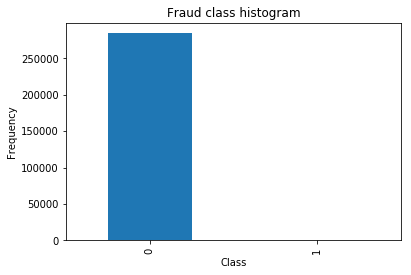

In [6]:
count_classes = pd.value_counts(data['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [7]:
Fraud= data[data['Class']==1]
Valid=data[data['Class']==0]

outlier_fraction=len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases:{}'.format(len(Fraud)))
print('Valid Cases:{}'.format(len(Valid)))

0.0017304750013189597
Fraud Cases:492
Valid Cases:284315


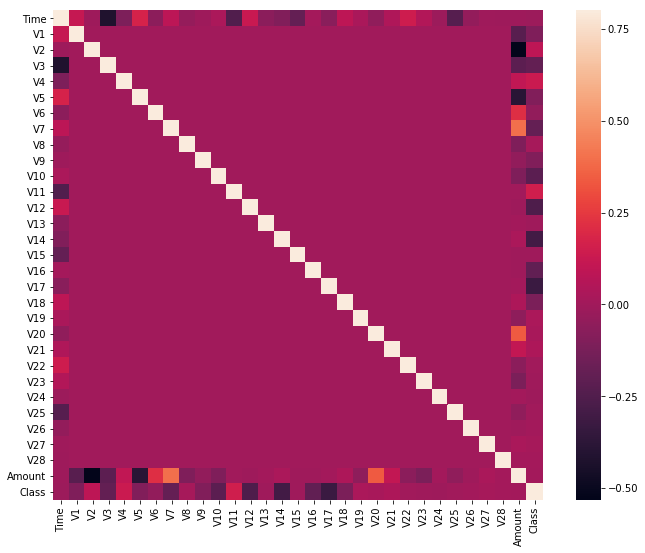

In [8]:
corrmat=data.corr()
fig=plt.figure(figsize=(12,9))

sns.heatmap(corrmat,vmax=.8, square=True)
plt.show()

In [9]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
columns=data.columns.tolist()

columns=[c for c in columns if c not in['Class']]
target='Class'

X=data[columns]
y=data[target]

print(X.shape)
print(y.shape)

(284807, 30)
(284807,)


In [11]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [12]:
state=1
classifiers={
    "Isolation Forest":IsolationForest(max_samples=len(X),
                                       contamination= outlier_fraction,
                                       random_state= state),
    "Local Outlier Factor": LocalOutlierFactor(
    n_neighbors=20,
    contamination=outlier_fraction)
}

In [ ]:
n_outliers=len(Fraud)

for i, (clf_name,clf) in enumerate (classifiers.items()):
    
    if clf_name== 'Local Outlier Factor':
        y_red=clf.fit_predict(X)
        scores_pred=clf.negative_outlier_factor_
        
    else:
        clf.fit(X)
        scores_pred=clf.decision_function(X)
        y_pred=clf.predict(X)
        
    y_pred[y_pred==1]=0
    y_pred[y_pred == -1]= 1
    
    n_errors =(y_pred !=y).sum()
    
    print('{}:{}'.format(clf_name,n_errors))
    print(accuracy_score(y,y_pred))
    print(classification_report(y,y_pred))
    

/Users/amyscott/anaconda2/envs/nthinkfulpython/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/Users/amyscott/anaconda2/envs/nthinkfulpython/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Isolation Forest:645
0.997735308472053
